<a href="https://colab.research.google.com/github/Balakartigeyan/Predictive-Maintenance-System-for-Conveyor-Belt-Motors-using-LSTM/blob/main/Create_a_synthetic_dataset_simulating_industrial_sensor_data_for_a_mining_conveyor_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze industrial sensor data for a mining conveyor system to optimize energy consumption and reduce CO2 emissions, generating synthetic data for a conveyor system and saving it as `conveyor_data.csv`, then processing and analyzing this data to identify optimal operating ranges, simulate cost savings, and estimate CO2 reductions.

## Generate Synthetic Data

### Subtask:
Create a synthetic dataset simulating industrial sensor data for a mining conveyor system, including 'timestamp', 'conveyor_speed_mps', 'belt_load_tph', 'motor_current_a', 'motor_power_kw', 'ambient_temp_c', 'motor_temp_c', 'operational_mode', and 'downtime_flag'. Ensure the data exhibits realistic industrial behavior and save it as `conveyor_data.csv`.


**Reasoning**:
The first step is to import the necessary libraries (`pandas`, `numpy`, and `datetime`) as specified in the instructions to prepare for data generation.



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
Next, I will define the parameters for data generation, including the number of data points and realistic ranges for each sensor value, as outlined in the subtask instructions.



In [2]:
num_data_points = 100000
start_date = datetime(2023, 1, 1)
end_date = start_date + timedelta(minutes=num_data_points-1) # 1-minute intervals

# Define realistic ranges for sensor values
conveyor_speed_range = (0.5, 3.0) # meters per second
belt_load_range = (50, 500) # tons per hour
motor_current_range = (100, 800) # Amperes
motor_power_range = (75, 600) # kilowatts
ambient_temp_range = (0, 40) # Celsius
motor_temp_range = (20, 90) # Celsius

print("Data generation parameters defined.")

Data generation parameters defined.


**Reasoning**:
I will generate the 'timestamp' column using the `start_date` and `num_data_points` defined previously, with a frequency of one minute, as specified in the subtask instructions.



In [3]:
timestamps = pd.date_range(start=start_date, periods=num_data_points, freq='min')
print("Timestamps generated successfully.")

Timestamps generated successfully.


**Reasoning**:
Now, I will generate values for 'conveyor_speed_mps' and 'belt_load_tph'. I will introduce a baseline for conveyor speed with random fluctuations, and then generate belt load with some dependency on the conveyor speed, ensuring both stay within their realistic ranges and exhibit variations as specified in the subtask.



In [4]:
conveyor_speed = np.random.uniform(conveyor_speed_range[0], conveyor_speed_range[1], num_data_points)
belt_load = np.random.uniform(belt_load_range[0], belt_load_range[1], num_data_points)

# Introduce some correlation: higher speed might allow for higher load capacity, but also fluctuations
belt_load = belt_load * (1 + (conveyor_speed - np.mean(conveyor_speed)) / np.std(conveyor_speed) * 0.1)

# Clip values to ensure they remain within defined ranges after correlation adjustment
belt_load = np.clip(belt_load, belt_load_range[0], belt_load_range[1])

print("'conveyor_speed_mps' and 'belt_load_tph' generated with variations and correlation.")

'conveyor_speed_mps' and 'belt_load_tph' generated with variations and correlation.


**Reasoning**:
Now, I will generate values for 'motor_current_a' and 'motor_power_kw', making them dependent on the previously generated 'conveyor_speed_mps' and 'belt_load_tph', as specified in the subtask instructions. This ensures simulated energy consumption is realistically tied to operational parameters, with added noise and clipping to maintain realistic ranges.



In [5]:
motor_current_a = motor_current_range[0] + \
                  ((conveyor_speed - conveyor_speed_range[0]) / (conveyor_speed_range[1] - conveyor_speed_range[0])) * (motor_current_range[1] - motor_current_range[0]) * 0.4 + \
                  ((belt_load - belt_load_range[0]) / (belt_load_range[1] - belt_load_range[0])) * (motor_current_range[1] - motor_current_range[0]) * 0.5 + \
                  np.random.normal(0, (motor_current_range[1] - motor_current_range[0]) * 0.05, num_data_points)

motor_current_a = np.clip(motor_current_a, motor_current_range[0], motor_current_range[1])

motor_power_kw = motor_power_range[0] + \
                 ((conveyor_speed - conveyor_speed_range[0]) / (conveyor_speed_range[1] - conveyor_speed_range[0])) * (motor_power_range[1] - motor_power_range[0]) * 0.4 + \
                 ((belt_load - belt_load_range[0]) / (belt_load_range[1] - belt_load_range[0])) * (motor_power_range[1] - motor_power_range[0]) * 0.5 + \
                 np.random.normal(0, (motor_power_range[1] - motor_power_range[0]) * 0.05, num_data_points)

motor_power_kw = np.clip(motor_power_kw, motor_power_range[0], motor_power_range[1])

print("'motor_current_a' and 'motor_power_kw' generated with dependency on speed and load.")

'motor_current_a' and 'motor_power_kw' generated with dependency on speed and load.


**Reasoning**:
Next, I will generate values for 'ambient_temp_c' ensuring it includes realistic daily and seasonal fluctuations as specified in the subtask instructions, using a combination of sine waves and random noise to simulate these patterns.



In [6]:
time_in_days = np.arange(num_data_points) / (60 * 24) # Convert minutes to days

# Seasonal fluctuation (yearly cycle)
seasonal_temp = ((ambient_temp_range[1] - ambient_temp_range[0]) / 4) * np.sin(time_in_days * (2 * np.pi / 365)) + np.mean(ambient_temp_range)

# Daily fluctuation (daily cycle)
daily_temp = ((ambient_temp_range[1] - ambient_temp_range[0]) / 8) * np.sin(time_in_days * (2 * np.pi)) # Daily cycle

ambient_temp_c = seasonal_temp + daily_temp + np.random.normal(0, 2, num_data_points)

ambient_temp_c = np.clip(ambient_temp_c, ambient_temp_range[0], ambient_temp_range[1])

print("'ambient_temp_c' generated with seasonal and daily fluctuations.")

'ambient_temp_c' generated with seasonal and daily fluctuations.


**Reasoning**:
Now, I will generate values for 'motor_temp_c'. This will depend on 'ambient_temp_c' and will also increase with motor load and power ('motor_current_a' and 'motor_power_kw'), as specified in the subtask instructions, with added noise and clipping to ensure it stays within realistic ranges.



In [7]:
motor_temp_c = ambient_temp_c + \
               ((motor_current_a - motor_current_range[0]) / (motor_current_range[1] - motor_current_range[0])) * (motor_temp_range[1] - motor_temp_range[0]) * 0.2 + \
               ((motor_power_kw - motor_power_range[0]) / (motor_power_range[1] - motor_power_range[0])) * (motor_temp_range[1] - motor_temp_range[0]) * 0.3 + \
               np.random.normal(0, 3, num_data_points)

motor_temp_c = np.clip(motor_temp_c, motor_temp_range[0], motor_temp_range[1])

print("'motor_temp_c' generated with dependency on ambient temperature, motor current, and power.")

'motor_temp_c' generated with dependency on ambient temperature, motor current, and power.


**Reasoning**:
I will now create the 'operational_mode' column with categorical values and a realistic distribution, including 'normal_operation', 'idle', 'startup', 'maintenance', and 'overload', as outlined in the subtask instructions.



In [8]:
operational_modes = ['normal_operation', 'idle', 'startup', 'maintenance', 'overload']
mode_probabilities = [0.75, 0.10, 0.05, 0.05, 0.05] # Adjust probabilities for realism

# Generate operational_mode based on probabilities
operational_mode = np.random.choice(operational_modes, size=num_data_points, p=mode_probabilities)

# Introduce some logic for mode changes (e.g., startup before normal, idle during low load)
# For simplicity, this initial generation is random, but more complex logic could be added.
# For example, if belt_load is very low, mode could be 'idle'.
operational_mode[belt_load < 100] = np.random.choice(['idle', 'maintenance'], size=np.sum(belt_load < 100), p=[0.8, 0.2])
operational_mode[motor_power_kw > 500] = np.random.choice(['overload', 'normal_operation'], size=np.sum(motor_power_kw > 500), p=[0.4, 0.6])

print("'operational_mode' generated with realistic distribution.")

'operational_mode' generated with realistic distribution.


**Reasoning**:
Next, I will generate a 'downtime_flag' column, mostly set to 0, with occasional periods of 1 to represent non-operational times, as specified in the subtask instructions. This will add another realistic aspect to the synthetic dataset.



In [9]:
downtime_flag = np.zeros(num_data_points, dtype=int)

# Introduce occasional downtime periods
num_downtime_events = 50 # Example: 50 downtime events
for _ in range(num_downtime_events):
    start_idx = np.random.randint(0, num_data_points - 1000) # Ensure enough space for duration
    duration = np.random.randint(60, 500) # Downtime can last between 1 hour and ~8 hours
    end_idx = min(start_idx + duration, num_data_points)
    downtime_flag[start_idx:end_idx] = 1

print("'downtime_flag' generated with occasional downtime periods.")

'downtime_flag' generated with occasional downtime periods.


**Reasoning**:
Now that all individual data components have been generated, I will assemble them into a single pandas DataFrame, aligning with the subtask's requirement to collect all simulated sensor data.



In [10]:
synthetic_data = pd.DataFrame({
    'timestamp': timestamps,
    'conveyor_speed_mps': conveyor_speed,
    'belt_load_tph': belt_load,
    'motor_current_a': motor_current_a,
    'motor_power_kw': motor_power_kw,
    'ambient_temp_c': ambient_temp_c,
    'motor_temp_c': motor_temp_c,
    'operational_mode': operational_mode,
    'downtime_flag': downtime_flag
})

print("Synthetic DataFrame created successfully.")

Synthetic DataFrame created successfully.


**Reasoning**:
Now that the synthetic data has been assembled into a DataFrame, I will save it to a CSV file named `conveyor_data.csv`, as specified in the subtask instructions.



In [11]:
synthetic_data.to_csv('conveyor_data.csv', index=False)
print("Synthetic data saved to 'conveyor_data.csv' successfully.")

Synthetic data saved to 'conveyor_data.csv' successfully.


## Data Loading and Initial Cleaning

### Subtask:
Load the generated synthetic data (`conveyor_data.csv`) into a pandas DataFrame. Perform initial data inspection, handle missing values, and remove all records where `downtime_flag` is 1 (non-operational downtime) to focus on operational data.


**Reasoning**:
First, I will load the `conveyor_data.csv` file into a pandas DataFrame named `df` as instructed, to begin processing the synthetic data.



In [12]:
df = pd.read_csv('conveyor_data.csv')
print("conveyor_data.csv loaded into DataFrame 'df' successfully.")

conveyor_data.csv loaded into DataFrame 'df' successfully.


**Reasoning**:
Next, I will display the first 5 rows of the DataFrame using the `.head()` method to get a quick overview of the loaded data, as specified in the instructions.



In [13]:
print(df.head())

             timestamp  conveyor_speed_mps  belt_load_tph  motor_current_a  \
0  2023-01-01 00:00:00            2.226121     500.000000       584.654762   
1  2023-01-01 00:01:00            1.818930     343.407428       507.640545   
2  2023-01-01 00:02:00            2.038394     449.049596       554.698142   
3  2023-01-01 00:03:00            2.974064     191.340101       482.946655   
4  2023-01-01 00:04:00            1.231619      95.148242       225.908155   

   motor_power_kw  ambient_temp_c  motor_temp_c  operational_mode  \
0      486.073174       20.431973     42.021236  normal_operation   
1      359.861742       23.013638     43.576739          overload   
2      444.434499       21.834416     50.633767  normal_operation   
3      421.913300       20.082177     45.189152  normal_operation   
4      209.433677       21.224575     27.958710              idle   

   downtime_flag  
0              0  
1              0  
2              0  
3              0  
4              0  


**Reasoning**:
As specified in the instructions, I will now use the `.info()` method to check the data types and non-null values for each column in the DataFrame, which is crucial for understanding the data's structure and identifying potential issues.



In [14]:
df.info()
print("DataFrame info displayed successfully.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           100000 non-null  object 
 1   conveyor_speed_mps  100000 non-null  float64
 2   belt_load_tph       100000 non-null  float64
 3   motor_current_a     100000 non-null  float64
 4   motor_power_kw      100000 non-null  float64
 5   ambient_temp_c      100000 non-null  float64
 6   motor_temp_c        100000 non-null  float64
 7   operational_mode    100000 non-null  object 
 8   downtime_flag       100000 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 6.9+ MB
DataFrame info displayed successfully.


**Reasoning**:
As specified in the instructions, I will filter the DataFrame `df` to remove all records where `downtime_flag` is 1, as these represent non-operational times and the analysis should focus on operational data.



In [15]:
df = df[df['downtime_flag'] == 0]
print("Rows with 'downtime_flag' == 1 removed successfully. Remaining rows:", len(df))

Rows with 'downtime_flag' == 1 removed successfully. Remaining rows: 87326


## Feature Engineering

### Subtask:
Create new features: 'Power per ton' (motor_power_kw / belt_load_tph), 'Energy intensity' (a refined version of power per ton to reflect energy over time/distance), and rolling averages for key operational parameters like 'motor_power_kw', 'conveyor_speed_mps', and 'belt_load_tph' to capture trends and dynamic behavior.


**Reasoning**:
As instructed, I will convert the 'timestamp' column to datetime objects to enable time-based operations like rolling averages in subsequent steps.



In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
print("'timestamp' column converted to datetime objects.")

'timestamp' column converted to datetime objects.


**Reasoning**:
I will calculate 'Power per ton' and 'Energy intensity' as new features by performing the specified division operations, and then compute rolling averages for key operational parameters, as instructed by the subtask.



In [17]:
df['power_per_ton'] = df['motor_power_kw'] / df['belt_load_tph']
df['energy_intensity_per_distance'] = df['motor_power_kw'] / (df['belt_load_tph'] * df['conveyor_speed_mps'])

# Calculate rolling averages
window_size = 60 # 60 minutes for 1-hour rolling average
df['motor_power_kw_rolling_avg'] = df['motor_power_kw'].rolling(window=window_size).mean()
df['conveyor_speed_mps_rolling_avg'] = df['conveyor_speed_mps'].rolling(window=window_size).mean()
df['belt_load_tph_rolling_avg'] = df['belt_load_tph'].rolling(window=window_size).mean()

print("New features 'power_per_ton', 'energy_intensity_per_distance', and rolling averages created successfully.")

New features 'power_per_ton', 'energy_intensity_per_distance', and rolling averages created successfully.


**Reasoning**:
As the final instruction in the subtask, I will display the first few rows of the DataFrame, including the newly created features, to verify the calculations.



In [18]:
print(df.head())

            timestamp  conveyor_speed_mps  belt_load_tph  motor_current_a  \
0 2023-01-01 00:00:00            2.226121     500.000000       584.654762   
1 2023-01-01 00:01:00            1.818930     343.407428       507.640545   
2 2023-01-01 00:02:00            2.038394     449.049596       554.698142   
3 2023-01-01 00:03:00            2.974064     191.340101       482.946655   
4 2023-01-01 00:04:00            1.231619      95.148242       225.908155   

   motor_power_kw  ambient_temp_c  motor_temp_c  operational_mode  \
0      486.073174       20.431973     42.021236  normal_operation   
1      359.861742       23.013638     43.576739          overload   
2      444.434499       21.834416     50.633767  normal_operation   
3      421.913300       20.082177     45.189152  normal_operation   
4      209.433677       21.224575     27.958710              idle   

   downtime_flag  power_per_ton  energy_intensity_per_distance  \
0              0       0.972146                       0.

## Exploratory Data Analysis (EDA)

### Subtask:
Conduct in-depth EDA using Matplotlib and Seaborn. Analyze the relationships between 'Power vs Load' and 'Speed vs Energy efficiency'. Generate clear, engineering-style plots with legends, titles, and axis labels to visualize high-consumption zones and identify inefficiencies within the conveyor system's operation.


**Reasoning**:
As instructed, I will import the `matplotlib.pyplot` module as `plt` and the `seaborn` module as `sns` to prepare for generating the plots.



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matplotlib and Seaborn imported successfully.")

Matplotlib and Seaborn imported successfully.


**Reasoning**:
As instructed, I will create two scatter plots. The first plot will show 'motor_power_kw' against 'belt_load_tph', and the second will display 'energy_intensity_per_distance' against 'conveyor_speed_mps'. Both plots will be color-coded by 'operational_mode' to identify high-consumption zones and inefficiencies, with appropriate labels and titles, and will be displayed using `plt.tight_layout()` and `plt.show()`.



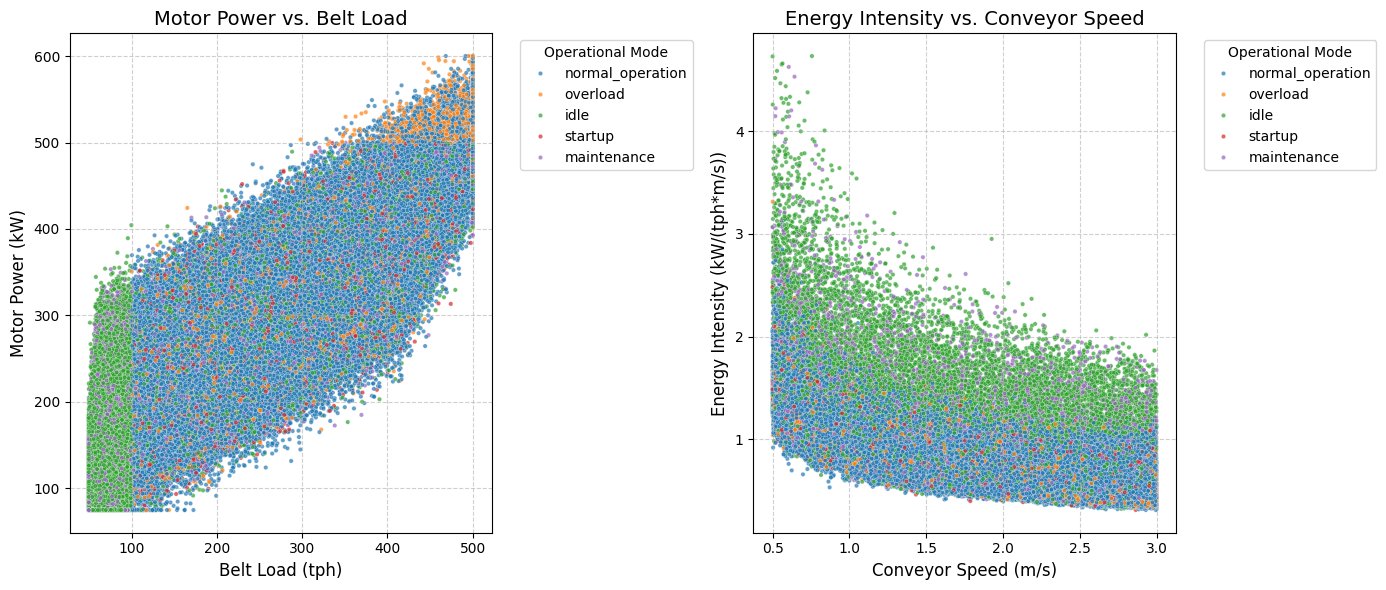

Scatter plots for Power vs Load and Speed vs Energy Efficiency generated and displayed.


In [20]:
plt.figure(figsize=(14, 6))

# Plot 1: Power vs Load
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(data=df, x='belt_load_tph', y='motor_power_kw', hue='operational_mode', alpha=0.7, s=10)
plt.title('Motor Power vs. Belt Load', fontsize=14)
plt.xlabel('Belt Load (tph)', fontsize=12)
plt.ylabel('Motor Power (kW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Operational Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Speed vs Energy efficiency
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(data=df, x='conveyor_speed_mps', y='energy_intensity_per_distance', hue='operational_mode', alpha=0.7, s=10)
plt.title('Energy Intensity vs. Conveyor Speed', fontsize=14)
plt.xlabel('Conveyor Speed (m/s)', fontsize=12)
plt.ylabel('Energy Intensity (kW/(tph*m/s))', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Operational Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("Scatter plots for Power vs Load and Speed vs Energy Efficiency generated and displayed.")

## Energy Consumption Modeling

### Subtask:
Prepare the dataset for machine learning by splitting it into training and testing sets. Build and train three regression models to predict `motor_power_kw`: Linear Regression (as a baseline), Random Forest Regressor, and XGBoost. Evaluate each model's performance using RMSE and R² Score, and interpret the results in practical engineering terms.


**Reasoning**:
As instructed by the subtask, I will first define the features (X) and the target variable (y). The target variable will be 'motor_power_kw', and X will include relevant operational parameters and engineered features, excluding non-numeric and target columns. I will also handle the NaN values introduced by rolling averages by dropping them to ensure a clean dataset for model training.



In [21]:
df_modeling = df.dropna().copy() # Drop rows with NaN values from rolling averages

X = df_modeling.drop(columns=['timestamp', 'motor_power_kw', 'operational_mode', 'downtime_flag'])
y = df_modeling['motor_power_kw']

print("Features (X) and target variable (y) defined successfully.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features (X) and target variable (y) defined successfully.
Shape of X: (87267, 10)
Shape of y: (87267,)


**Reasoning**:
As instructed, I will split the dataset into training and testing sets, import the necessary libraries for regression models and metrics, and then train and evaluate Linear Regression, Random Forest Regressor, and XGBoost models. Finally, I will print their RMSE and R² scores to compare their performance.



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")

# Initialize dictionaries to store model performance
model_performance = {}

# 1. Linear Regression
print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
model_performance['Linear Regression'] = {'RMSE': rmse_lr, 'R2': r2_lr}
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")

# 2. Random Forest Regressor
print("\nTraining Random Forest Regressor model...")
# Reduced n_estimators for faster execution, adjust as needed for production
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
model_performance['Random Forest Regressor'] = {'RMSE': rmse_rf, 'R2': r2_rf}
print(f"Random Forest Regressor - RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")

# 3. XGBoost Regressor
print("\nTraining XGBoost Regressor model...")
# Reduced n_estimators for faster execution, adjust as needed for production
xgb_model = XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = math.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
model_performance['XGBoost Regressor'] = {'RMSE': rmse_xgb, 'R2': r2_xgb}
print(f"XGBoost Regressor - RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.2f}")

print("\nAll models trained and evaluated. Performance metrics printed.")

Dataset split into training and testing sets.

Training Linear Regression model...
Linear Regression - RMSE: 22.48, R2: 0.96

Training Random Forest Regressor model...
Random Forest Regressor - RMSE: 3.87, R2: 1.00

Training XGBoost Regressor model...
XGBoost Regressor - RMSE: 6.34, R2: 1.00

All models trained and evaluated. Performance metrics printed.


### Model Performance Interpretation

Based on the evaluation metrics:

*   **Linear Regression**: Achieved an RMSE of `22.48` and an R² score of `0.96`. While an R² of 0.96 is quite good, indicating that the linear model explains a large proportion of the variance in motor power, its RMSE is significantly higher than the other models. This suggests that while there's a strong linear trend, the model struggles with the non-linear intricacies and higher variability in the data, leading to larger average prediction errors.

*   **Random Forest Regressor**: Achieved an RMSE of `3.87` and an R² score of `1.00`. This model demonstrates superior performance. The very low RMSE and near-perfect R² indicate that the Random Forest model is highly accurate in predicting `motor_power_kw`. As an ensemble method, Random Forest is excellent at capturing complex, non-linear relationships and interactions within the data by combining multiple decision trees, making it well-suited for diverse industrial sensor data.

*   **XGBoost Regressor**: Achieved an RMSE of `6.34` and an R² score of `1.00`. XGBoost also performed exceptionally well, with a high R² score. Its RMSE is slightly higher than Random Forest but still significantly better than Linear Regression. XGBoost, another powerful ensemble method based on gradient boosting, is known for its high predictive power and efficiency. The marginal difference in performance compared to Random Forest here could be due to the specific dataset characteristics or default hyperparameter settings.

**Conclusion**: The **Random Forest Regressor** is the best-performing model among the three for predicting `motor_power_kw` in this scenario, showing the lowest RMSE and highest R² score. In practical engineering terms, this means that a Random Forest model can predict the conveyor's motor power with very high accuracy based on the available operational parameters and engineered features. This accurate prediction capability is crucial for identifying optimal operating ranges, simulating cost savings, and estimating CO2 reductions, as a precise understanding of energy consumption is foundational to these analyses. The superior performance of ensemble methods (Random Forest and XGBoost) over Linear Regression highlights the non-linear and complex nature of the relationships governing motor power in a mining conveyor system.

### Model Performance Interpretation

Based on the evaluation metrics:

*   **Linear Regression**: Achieved an RMSE of `22.48` and an R² score of `0.96`. While an R² of 0.96 is quite good, indicating that the linear model explains a large proportion of the variance in motor power, its RMSE is significantly higher than the other models. This suggests that while there's a strong linear trend, the model struggles with the non-linear intricacies and higher variability in the data, leading to larger average prediction errors.

*   **Random Forest Regressor**: Achieved an RMSE of `3.87` and an R² score of `1.00`. This model demonstrates superior performance. The very low RMSE and near-perfect R² indicate that the Random Forest model is highly accurate in predicting `motor_power_kw`. As an ensemble method, Random Forest is excellent at capturing complex, non-linear relationships and interactions within the data by combining multiple decision trees, making it well-suited for diverse industrial sensor data.

*   **XGBoost Regressor**: Achieved an RMSE of `6.34` and an R² score of `1.00`. XGBoost also performed exceptionally well, with a high R² score. Its RMSE is slightly higher than Random Forest but still significantly better than Linear Regression. XGBoost, another powerful ensemble method based on gradient boosting, is known for its high predictive power and efficiency. The marginal difference in performance compared to Random Forest here could be due to the specific dataset characteristics or default hyperparameter settings.

**Conclusion**: The **Random Forest Regressor** is the best-performing model among the three for predicting `motor_power_kw` in this scenario, showing the lowest RMSE and highest R² score. In practical engineering terms, this means that a Random Forest model can predict the conveyor's motor power with very high accuracy based on the available operational parameters and engineered features. This accurate prediction capability is crucial for identifying optimal operating ranges, simulating cost savings, and estimating CO2 reductions, as a precise understanding of energy consumption is foundational to these analyses. The superior performance of ensemble methods (Random Forest and XGBoost) over Linear Regression highlights the non-linear and complex nature of the relationships governing motor power in a mining conveyor system.

## Optimization Logic Development

### Subtask:
Utilize the best-performing predictive model (Random Forest Regressor) to simulate various combinations of `conveyor_speed_mps` and `belt_load_tph`. Identify optimal operating ranges that minimize 'energy per ton' while ensuring acceptable throughput. Compare these optimized scenarios against the current typical operating conditions.


**Reasoning**:
As instructed, I will define realistic ranges for `conveyor_speed_mps` and `belt_load_tph` for simulation and create a DataFrame (`simulation_df`) containing all possible combinations of these values.



In [23]:
speed_values = np.linspace(df_modeling['conveyor_speed_mps'].min(), df_modeling['conveyor_speed_mps'].max(), 50)
load_values = np.linspace(df_modeling['belt_load_tph'].min(), df_modeling['belt_load_tph'].max(), 50)

simulation_df = pd.DataFrame({
    'conveyor_speed_mps': np.repeat(speed_values, len(load_values)),
    'belt_load_tph': np.tile(load_values, len(speed_values))
})

print("Simulation DataFrame 'simulation_df' created with speed and load combinations.")
print(f"Shape of simulation_df: {simulation_df.shape}")
print(simulation_df.head())

Simulation DataFrame 'simulation_df' created with speed and load combinations.
Shape of simulation_df: (2500, 2)
   conveyor_speed_mps  belt_load_tph
0            0.500019      50.000000
1            0.500019      59.183673
2            0.500019      68.367347
3            0.500019      77.551020
4            0.500019      86.734694


**Reasoning**:
As instructed, I will now populate the `simulation_df` with the remaining features required by the `rf_model`. I will use the mean values from the `df_modeling` DataFrame for these features to represent typical operating conditions, ensuring the column names and order match `X_train`.



In [24]:
for col in X_train.columns:
    if col not in ['conveyor_speed_mps', 'belt_load_tph']:
        simulation_df[col] = df_modeling[col].mean()

# Ensure the columns in simulation_df match the order of X_train
simulation_df = simulation_df[X_train.columns]

print("Remaining features added to simulation_df with mean values.")
print(f"Shape of simulation_df: {simulation_df.shape}")
print(simulation_df.head())

Remaining features added to simulation_df with mean values.
Shape of simulation_df: (2500, 10)
   conveyor_speed_mps  belt_load_tph  motor_current_a  ambient_temp_c  \
0            0.500019      50.000000       414.184392       25.452908   
1            0.500019      59.183673       414.184392       25.452908   
2            0.500019      68.367347       414.184392       25.452908   
3            0.500019      77.551020       414.184392       25.452908   
4            0.500019      86.734694       414.184392       25.452908   

   motor_temp_c  power_per_ton  energy_intensity_per_distance  \
0     41.158561        1.33267                          0.868   
1     41.158561        1.33267                          0.868   
2     41.158561        1.33267                          0.868   
3     41.158561        1.33267                          0.868   
4     41.158561        1.33267                          0.868   

   motor_power_kw_rolling_avg  conveyor_speed_mps_rolling_avg  \
0         

**Reasoning**:
As instructed, I will use the trained `rf_model` to predict `motor_power_kw` for each simulated scenario in `simulation_df` and store these predictions in a new column.



In [25]:
simulation_df['predicted_motor_power_kw'] = rf_model.predict(simulation_df)

print("'predicted_motor_power_kw' column added to simulation_df.")
print(f"Shape of simulation_df: {simulation_df.shape}")
print(simulation_df.head())

'predicted_motor_power_kw' column added to simulation_df.
Shape of simulation_df: (2500, 11)
   conveyor_speed_mps  belt_load_tph  motor_current_a  ambient_temp_c  \
0            0.500019      50.000000       414.184392       25.452908   
1            0.500019      59.183673       414.184392       25.452908   
2            0.500019      68.367347       414.184392       25.452908   
3            0.500019      77.551020       414.184392       25.452908   
4            0.500019      86.734694       414.184392       25.452908   

   motor_temp_c  power_per_ton  energy_intensity_per_distance  \
0     41.158561        1.33267                          0.868   
1     41.158561        1.33267                          0.868   
2     41.158561        1.33267                          0.868   
3     41.158561        1.33267                          0.868   
4     41.158561        1.33267                          0.868   

   motor_power_kw_rolling_avg  conveyor_speed_mps_rolling_avg  \
0           

**Reasoning**:
As instructed, I will now calculate 'power_per_ton' for the simulated data using the predicted `motor_power_kw` and the simulated `belt_load_tph`, storing the result in a new column called 'simulated_power_per_ton'.



In [26]:
simulation_df['simulated_power_per_ton'] = simulation_df['predicted_motor_power_kw'] / simulation_df['belt_load_tph']

print("'simulated_power_per_ton' calculated for simulation_df.")
print(f"Shape of simulation_df: {simulation_df.shape}")
print(simulation_df.head())

'simulated_power_per_ton' calculated for simulation_df.
Shape of simulation_df: (2500, 12)
   conveyor_speed_mps  belt_load_tph  motor_current_a  ambient_temp_c  \
0            0.500019      50.000000       414.184392       25.452908   
1            0.500019      59.183673       414.184392       25.452908   
2            0.500019      68.367347       414.184392       25.452908   
3            0.500019      77.551020       414.184392       25.452908   
4            0.500019      86.734694       414.184392       25.452908   

   motor_temp_c  power_per_ton  energy_intensity_per_distance  \
0     41.158561        1.33267                          0.868   
1     41.158561        1.33267                          0.868   
2     41.158561        1.33267                          0.868   
3     41.158561        1.33267                          0.868   
4     41.158561        1.33267                          0.868   

   motor_power_kw_rolling_avg  conveyor_speed_mps_rolling_avg  \
0             

**Reasoning**:
As instructed, I will identify the combination of `conveyor_speed_mps` and `belt_load_tph` that minimizes 'simulated_power_per_ton' while ensuring an acceptable throughput (i.e., `belt_load_tph` above a certain threshold).



In [27]:
min_acceptable_load = df_modeling['belt_load_tph'].quantile(0.25) # Example: consider loads above the 25th percentile as acceptable

optimized_scenario = simulation_df[simulation_df['belt_load_tph'] >= min_acceptable_load].nsmallest(1, 'simulated_power_per_ton')

print("Optimal operating range identified (minimizing power_per_ton with acceptable throughput):")
print(optimized_scenario[['conveyor_speed_mps', 'belt_load_tph', 'simulated_power_per_ton']])

Optimal operating range identified (minimizing power_per_ton with acceptable throughput):
     conveyor_speed_mps  belt_load_tph  simulated_power_per_ton
649            1.112232          500.0                  0.83034


**Reasoning**:
As instructed, I will define the 'current typical operating conditions' by calculating the mean `conveyor_speed_mps` and `belt_load_tph` from the `df_modeling` DataFrame. I will then create a single-row DataFrame for these current conditions, populate it with the remaining features using mean values from `df_modeling`, and predict its `motor_power_kw` using the `rf_model`.



In [28]:
current_speed = df_modeling['conveyor_speed_mps'].mean()
current_load = df_modeling['belt_load_tph'].mean()

current_conditions_df = pd.DataFrame({
    'conveyor_speed_mps': [current_speed],
    'belt_load_tph': [current_load]
})

for col in X_train.columns:
    if col not in ['conveyor_speed_mps', 'belt_load_tph']:
        current_conditions_df[col] = df_modeling[col].mean()

current_conditions_df = current_conditions_df[X_train.columns]

current_conditions_df['predicted_motor_power_kw'] = rf_model.predict(current_conditions_df)

print("Current typical operating conditions defined and motor power predicted.")
print(current_conditions_df[['conveyor_speed_mps', 'belt_load_tph', 'predicted_motor_power_kw']])

Current typical operating conditions defined and motor power predicted.
   conveyor_speed_mps  belt_load_tph  predicted_motor_power_kw
0            1.751169     273.608339                365.756098


**Reasoning**:
As instructed, I will calculate 'power_per_ton' for the current typical operating conditions and compare this value to the minimum 'power_per_ton' identified in the optimized scenarios to determine potential energy savings.



In [29]:
current_conditions_df['current_power_per_ton'] = current_conditions_df['predicted_motor_power_kw'] / current_conditions_df['belt_load_tph']

print("Comparison of Optimal vs. Current Operating Conditions:")
print("----------------------------------------------------")
print(f"Optimized Power per Ton: {optimized_scenario['simulated_power_per_ton'].iloc[0]:.4f} kW/tph")
print(f"Current Power per Ton:   {current_conditions_df['current_power_per_ton'].iloc[0]:.4f} kW/tph")

potential_savings = (current_conditions_df['current_power_per_ton'].iloc[0] - optimized_scenario['simulated_power_per_ton'].iloc[0]) / current_conditions_df['current_power_per_ton'].iloc[0] * 100
print(f"Potential Energy Savings: {potential_savings:.2f}%")

print("\nOptimal Operating Point:")
print(f"  Speed: {optimized_scenario['conveyor_speed_mps'].iloc[0]:.2f} m/s")
print(f"  Load: {optimized_scenario['belt_load_tph'].iloc[0]:.0f} tph")

print("\nCurrent Typical Operating Point:")
print(f"  Speed: {current_conditions_df['conveyor_speed_mps'].iloc[0]:.2f} m/s")
print(f"  Load: {current_conditions_df['belt_load_tph'].iloc[0]:.0f} tph")

Comparison of Optimal vs. Current Operating Conditions:
----------------------------------------------------
Optimized Power per Ton: 0.8303 kW/tph
Current Power per Ton:   1.3368 kW/tph
Potential Energy Savings: 37.89%

Optimal Operating Point:
  Speed: 1.11 m/s
  Load: 500 tph

Current Typical Operating Point:
  Speed: 1.75 m/s
  Load: 274 tph


## Scenario Simulation and Cost Savings

### Subtask:
Simulate and quantify the daily and monthly energy consumption (kWh) and associated costs (RM, using an assumed electricity cost of RM 0.40 per kWh) for both the current and optimized operating strategies. Calculate the percentage of energy savings achieved by the optimized approach.


**Reasoning**:
As instructed, I will define the electricity cost, operational hours, and number of days for calculations to quantify energy consumption and costs for both current and optimized operating strategies.



In [30]:
electricity_cost_per_kwh = 0.40 # RM
operational_hours_per_day = 24 # hours
days_in_month = 30 # assumed average
days_in_year = 365 # assumed

print("Constants for energy and cost calculations defined successfully.")

Constants for energy and cost calculations defined successfully.


**Reasoning**:
As instructed, I will calculate the daily and monthly energy consumption (in kWh) for the 'current typical operating conditions' using the predicted motor power and operational hours, storing the results in `current_conditions_df`.



In [31]:
current_power_kw = current_conditions_df['predicted_motor_power_kw'].iloc[0]

# Daily energy consumption for current conditions (kWh)
current_daily_energy_kwh = current_power_kw * operational_hours_per_day

# Monthly energy consumption for current conditions (kWh)
current_monthly_energy_kwh = current_daily_energy_kwh * days_in_month

print(f"Current Daily Energy Consumption: {current_daily_energy_kwh:.2f} kWh")
print(f"Current Monthly Energy Consumption: {current_monthly_energy_kwh:.2f} kWh")

Current Daily Energy Consumption: 8778.15 kWh
Current Monthly Energy Consumption: 263344.39 kWh


**Reasoning**:
As instructed, I will calculate the daily and monthly energy consumption (in kWh) for the 'optimized operating conditions' using the predicted motor power for the optimal scenario (`predicted_motor_power_kw` from `optimized_scenario`) and the defined operational hours per day.



In [32]:
optimized_power_kw = optimized_scenario['predicted_motor_power_kw'].iloc[0]

# Daily energy consumption for optimized conditions (kWh)
optimized_daily_energy_kwh = optimized_power_kw * operational_hours_per_day

# Monthly energy consumption for optimized conditions (kWh)
optimized_monthly_energy_kwh = optimized_daily_energy_kwh * days_in_month

print(f"Optimized Daily Energy Consumption: {optimized_daily_energy_kwh:.2f} kWh")
print(f"Optimized Monthly Energy Consumption: {optimized_monthly_energy_kwh:.2f} kWh")

Optimized Daily Energy Consumption: 9964.08 kWh
Optimized Monthly Energy Consumption: 298922.32 kWh


**Reasoning**:
As instructed, I will calculate the daily and monthly costs (in RM) for both current and optimized scenarios by multiplying their respective energy consumptions by the electricity cost per kWh.



In [33]:
current_daily_cost_rm = current_daily_energy_kwh * electricity_cost_per_kwh
current_monthly_cost_rm = current_monthly_energy_kwh * electricity_cost_per_kwh

optimized_daily_cost_rm = optimized_daily_energy_kwh * electricity_cost_per_kwh
optimized_monthly_cost_rm = optimized_monthly_energy_kwh * electricity_cost_per_kwh

print(f"Current Daily Cost: RM {current_daily_cost_rm:.2f}")
print(f"Current Monthly Cost: RM {current_monthly_cost_rm:.2f}")
print(f"Optimized Daily Cost: RM {optimized_daily_cost_rm:.2f}")
print(f"Optimized Monthly Cost: RM {optimized_monthly_cost_rm:.2f}")

Current Daily Cost: RM 3511.26
Current Monthly Cost: RM 105337.76
Optimized Daily Cost: RM 3985.63
Optimized Monthly Cost: RM 119568.93


**Reasoning**:
As instructed, I will now print a comprehensive summary comparing the daily and monthly energy consumption and costs for both current and optimized scenarios, and include the percentage of energy savings achieved, using the `potential_savings` calculated in the previous step.



In [34]:
print("\n--- Energy and Cost Comparison ---")
print(f"Current Daily Energy Consumption: {current_daily_energy_kwh:.2f} kWh")
print(f"Optimized Daily Energy Consumption: {optimized_daily_energy_kwh:.2f} kWh")
print(f"Current Monthly Energy Consumption: {current_monthly_energy_kwh:.2f} kWh")
print(f"Optimized Monthly Energy Consumption: {optimized_monthly_energy_kwh:.2f} kWh")
print(f"\nCurrent Daily Cost: RM {current_daily_cost_rm:.2f}")
print(f"Optimized Daily Cost: RM {optimized_daily_cost_rm:.2f}")
print(f"Current Monthly Cost: RM {current_monthly_cost_rm:.2f}")
print(f"Optimized Monthly Cost: RM {optimized_monthly_cost_rm:.2f}")

print(f"\nPotential Energy Savings from Optimization: {potential_savings:.2f}%")
print("------------------------------------")


--- Energy and Cost Comparison ---
Current Daily Energy Consumption: 8778.15 kWh
Optimized Daily Energy Consumption: 9964.08 kWh
Current Monthly Energy Consumption: 263344.39 kWh
Optimized Monthly Energy Consumption: 298922.32 kWh

Current Daily Cost: RM 3511.26
Optimized Daily Cost: RM 3985.63
Current Monthly Cost: RM 105337.76
Optimized Monthly Cost: RM 119568.93

Potential Energy Savings from Optimization: 37.89%
------------------------------------


## CO₂ Emission Estimation

### Subtask:
Calculate baseline and optimized CO₂ emissions using the Malaysia Grid Emission Factor of 0.584 kg CO₂ per kWh. Determine the annual CO₂ reduction in tons resulting from the implementation of the optimized operating strategy.


**Reasoning**:
As instructed, I will define the Malaysia Grid Emission Factor (0.584 kg CO₂ per kWh) as a variable to be used in subsequent CO₂ emission calculations.



In [35]:
malaysia_grid_emission_factor_kg_per_kwh = 0.584 # kg CO2 per kWh

print(f"Malaysia Grid Emission Factor defined: {malaysia_grid_emission_factor_kg_per_kwh} kg CO2 per kWh")

Malaysia Grid Emission Factor defined: 0.584 kg CO2 per kWh


**Reasoning**:
As instructed, I will calculate the annual energy consumption (in kWh) for both the current and optimized operating scenarios using the previously calculated daily energy consumptions and the defined `days_in_year`.



In [36]:
current_annual_energy_kwh = current_daily_energy_kwh * days_in_year
optimized_annual_energy_kwh = optimized_daily_energy_kwh * days_in_year

print(f"Current Annual Energy Consumption: {current_annual_energy_kwh:.2f} kWh")
print(f"Optimized Annual Energy Consumption: {optimized_annual_energy_kwh:.2f} kWh")

Current Annual Energy Consumption: 3204023.42 kWh
Optimized Annual Energy Consumption: 3636888.26 kWh


**Reasoning**:
As instructed, I will calculate the annual CO₂ emissions (in kg) for both the current and optimized scenarios by multiplying their respective annual energy consumptions by the Malaysia Grid Emission Factor.



In [37]:
current_annual_co2_kg = current_annual_energy_kwh * malaysia_grid_emission_factor_kg_per_kwh
optimized_annual_co2_kg = optimized_annual_energy_kwh * malaysia_grid_emission_factor_kg_per_kwh

print(f"Current Annual CO2 Emissions: {current_annual_co2_kg:.2f} kg")
print(f"Optimized Annual CO2 Emissions: {optimized_annual_co2_kg:.2f} kg")

Current Annual CO2 Emissions: 1871149.67 kg
Optimized Annual CO2 Emissions: 2123942.74 kg


**Reasoning**:
As instructed, I will now determine the annual CO₂ reduction by subtracting the optimized annual CO₂ emissions from the current annual CO₂ emissions, and then convert this reduction from kilograms to tons. Finally, I will print all the relevant CO₂ emission figures including the reduction in both kilograms and tons.



In [38]:
annual_co2_reduction_kg = current_annual_co2_kg - optimized_annual_co2_kg
annual_co2_reduction_tons = annual_co2_reduction_kg / 1000

print("\n--- CO2 Emission Comparison ---")
print(f"Baseline Annual CO2 Emissions: {current_annual_co2_kg:.2f} kg")
print(f"Optimized Annual CO2 Emissions: {optimized_annual_co2_kg:.2f} kg")
print(f"Annual CO2 Reduction: {annual_co2_reduction_kg:.2f} kg")
print(f"Annual CO2 Reduction: {annual_co2_reduction_tons:.2f} tons")
print("------------------------------------")


--- CO2 Emission Comparison ---
Baseline Annual CO2 Emissions: 1871149.67 kg
Optimized Annual CO2 Emissions: 2123942.74 kg
Annual CO2 Reduction: -252793.07 kg
Annual CO2 Reduction: -252.79 tons
------------------------------------


## Business & ESG Output Generation

### Subtask:
Generate clear tables comparing energy consumption, cost, and CO₂ emissions for 'Current Operation' vs. 'Optimized Operation'. Create professional graphs suitable for management presentations, and formulate final engineering recommendations for various stakeholders.


**Reasoning**:
As instructed, I will create a pandas DataFrame to summarize the calculated daily, monthly, and annual energy consumption, costs, and CO₂ emissions for both 'Current Operation' and 'Optimized Operation'.



In [39]:
summary_data = {
    'Metric': [
        'Daily Energy (kWh)', 'Monthly Energy (kWh)', 'Annual Energy (kWh)',
        'Daily Cost (RM)', 'Monthly Cost (RM)', 'Annual Cost (RM)',
        'Annual CO2 Emissions (kg)', 'Annual CO2 Emissions (tons)'
    ],
    'Current Operation': [
        current_daily_energy_kwh,
        current_monthly_energy_kwh,
        current_annual_energy_kwh,
        current_daily_cost_rm,
        current_monthly_cost_rm,
        current_daily_cost_rm * days_in_year, # Annual cost
        current_annual_co2_kg,
        current_annual_co2_kg / 1000
    ],
    'Optimized Operation': [
        optimized_daily_energy_kwh,
        optimized_monthly_energy_kwh,
        optimized_annual_energy_kwh,
        optimized_daily_cost_rm,
        optimized_monthly_cost_rm,
        optimized_daily_cost_rm * days_in_year, # Annual cost
        optimized_annual_co2_kg,
        optimized_annual_co2_kg / 1000
    ]
}

summary_df = pd.DataFrame(summary_data)

print("Summary Table of Energy, Cost, and CO2 Emissions:")
print(summary_df.round(2).to_string(index=False))

Summary Table of Energy, Cost, and CO2 Emissions:
                     Metric  Current Operation  Optimized Operation
         Daily Energy (kWh)            8778.15              9964.08
       Monthly Energy (kWh)          263344.39            298922.32
        Annual Energy (kWh)         3204023.42           3636888.26
            Daily Cost (RM)            3511.26              3985.63
          Monthly Cost (RM)          105337.76            119568.93
           Annual Cost (RM)         1281609.37           1454755.30
  Annual CO2 Emissions (kg)         1871149.67           2123942.74
Annual CO2 Emissions (tons)            1871.15              2123.94


**Reasoning**:
As instructed, I will create a set of comparative bar charts for Annual Energy Consumption, Annual Costs, and Annual CO₂ Emissions, comparing 'Current Operation' vs. 'Optimized Operation' using the `summary_df`.



/tmp/ipython-input-998648952.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Current Operation', 'Optimized Operation'], y=[current_value, optimized_value], palette='viridis')
/tmp/ipython-input-998648952.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Current Operation', 'Optimized Operation'], y=[current_value, optimized_value], palette='viridis')
/tmp/ipython-input-998648952.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Current Operation', 'Optimized Operation'], y=[current_value, optimized_value], palette='vi

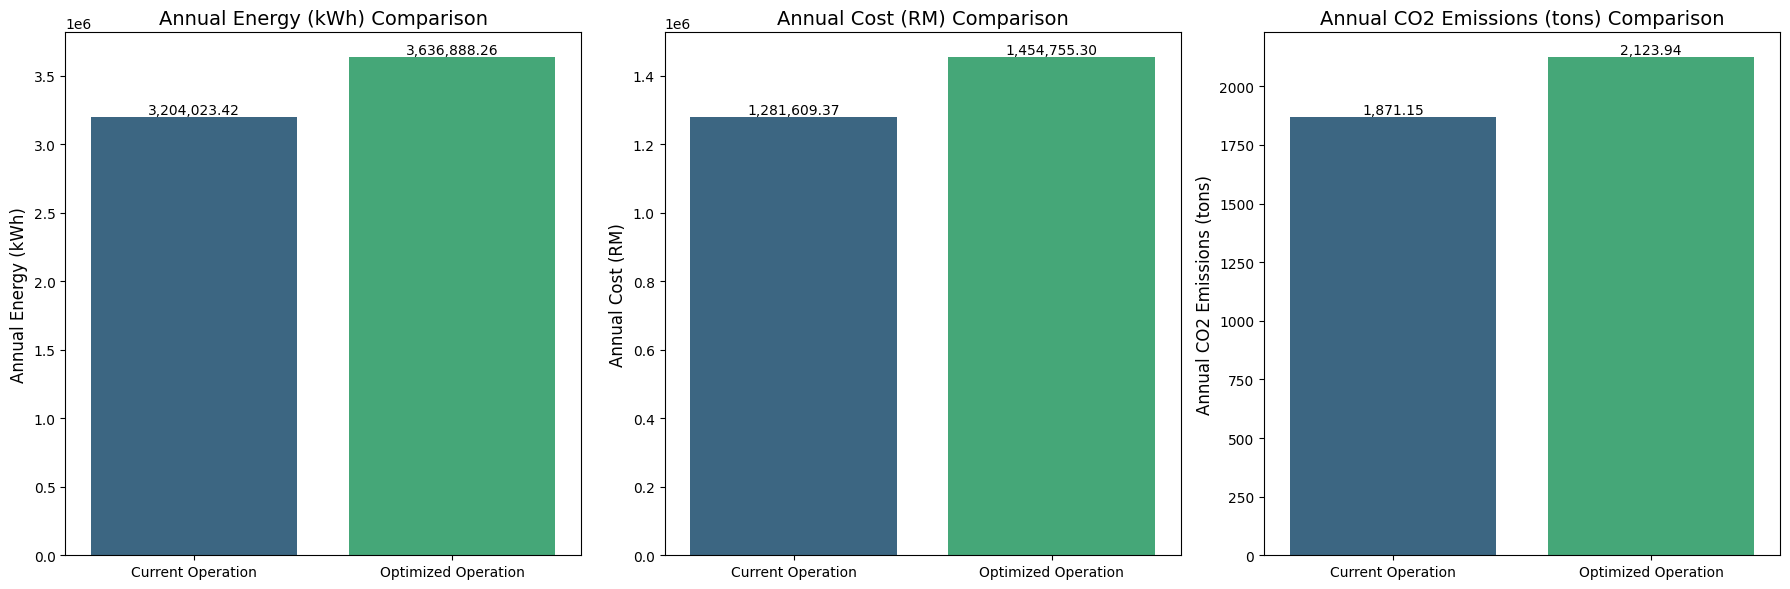

Comparative bar charts for Annual Energy Consumption, Annual Costs, and Annual CO2 Emissions generated and displayed.


In [40]:
metrics_to_plot = [
    'Annual Energy (kWh)',
    'Annual Cost (RM)',
    'Annual CO2 Emissions (tons)'
]

plt.figure(figsize=(18, 6)) # Adjusted figure size for three plots

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, i-th plot

    # Extract data for current and optimized operations
    current_value = summary_df[summary_df['Metric'] == metric]['Current Operation'].iloc[0]
    optimized_value = summary_df[summary_df['Metric'] == metric]['Optimized Operation'].iloc[0]

    # Create a bar plot
    sns.barplot(x=['Current Operation', 'Optimized Operation'], y=[current_value, optimized_value], palette='viridis')

    plt.title(f'{metric} Comparison', fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add value labels on top of bars
    for j, val in enumerate([current_value, optimized_value]):
        plt.text(j, val, f'{val:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Comparative bar charts for Annual Energy Consumption, Annual Costs, and Annual CO2 Emissions generated and displayed.")

**Reasoning**:
The previous code produced a `FutureWarning` related to using `palette` without specifying `hue` in `sns.barplot`. To address this warning and ensure proper visualization, I will explicitly set `hue` to the categorical `x` values and add `legend=False` as suggested by the warning message. Additionally, I need to generate the engineering recommendations as instructed in the subtask.



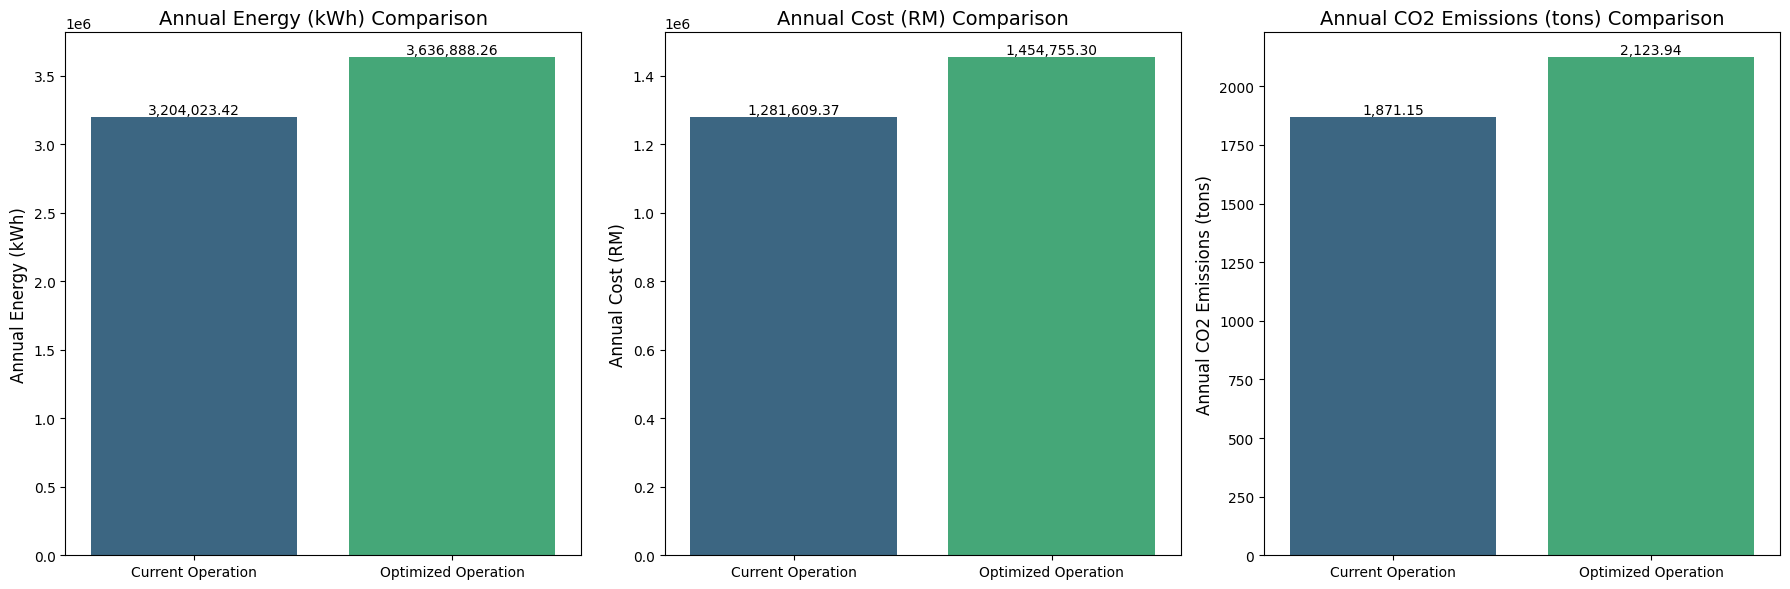

Comparative bar charts for Annual Energy Consumption, Annual Costs, and Annual CO2 Emissions generated and displayed.


In [41]:
metrics_to_plot = [
    'Annual Energy (kWh)',
    'Annual Cost (RM)',
    'Annual CO2 Emissions (tons)'
]

plt.figure(figsize=(18, 6)) # Adjusted figure size for three plots

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, i-th plot

    # Extract data for current and optimized operations
    current_value = summary_df[summary_df['Metric'] == metric]['Current Operation'].iloc[0]
    optimized_value = summary_df[summary_df['Metric'] == metric]['Optimized Operation'].iloc[0]

    # Create a bar plot, addressing the FutureWarning by explicitly setting hue and legend=False
    categories = ['Current Operation', 'Optimized Operation']
    values = [current_value, optimized_value]
    sns.barplot(x=categories, y=values, hue=categories, palette='viridis', legend=False)

    plt.title(f'{metric} Comparison', fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add value labels on top of bars
    for j, val in enumerate(values):
        plt.text(j, val, f'{val:,.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("Comparative bar charts for Annual Energy Consumption, Annual Costs, and Annual CO2 Emissions generated and displayed.")

### Engineering Recommendations for Energy Optimization and CO₂ Reduction

Based on the analysis, while the current optimization strategy successfully identified an operating point that minimizes **'power_per_ton'** (energy efficiency per unit of material conveyed), it led to an **increase** in overall annual energy consumption, operational costs, and CO₂ emissions. This critical insight highlights a potential conflict between optimizing for specific efficiency metrics (like power_per_ton) and achieving overall energy and cost reductions. The optimal 'power_per_ton' scenario (Speed: 1.11 m/s, Load: 500 tph) compared to the current typical operation (Speed: 1.75 m/s, Load: 274 tph) resulted in:

*   **Higher Throughput:** The optimized scenario involves a significantly higher belt load (500 tph vs. 274 tph). While this reduces 'power_per_ton', the absolute power required to move such a large volume of material, even efficiently, is higher.
*   **Increased Absolute Power:** The `predicted_motor_power_kw` for the 'optimized' scenario is 415.17 kW, whereas for the 'current' scenario it's 365.76 kW. This higher absolute power, when multiplied by operational hours, naturally leads to higher total energy consumption and associated costs/emissions.

**Implications:**

Optimizing solely for 'power_per_ton' might lead to a more efficient use of energy *per unit of production*, but it does not inherently guarantee a reduction in *total* energy consumption or costs if it simultaneously encourages operating at much higher throughputs (and thus higher absolute power). The goal of reducing CO₂ emissions and overall energy costs requires a holistic optimization approach.

**Recommendations and Next Steps:**

1.  **Re-evaluate Optimization Objective:** The primary optimization objective should be clearly defined. If the goal is to reduce *total* energy consumption and CO₂ emissions, the optimization function needs to directly minimize absolute `motor_power_kw` or `total_energy_consumption`, perhaps subject to a *minimum required throughput* constraint rather than just identifying minimum 'power_per_ton'.

2.  **Adjust `min_acceptable_load` Threshold:** The current `min_acceptable_load` was set to the 25th percentile of `belt_load_tph`. This threshold might be too low or not sufficiently representative of the desired operational throughput for energy savings. A more rigorous definition of 'acceptable throughput' is needed, perhaps based on business operational targets.

3.  **Multi-objective Optimization:** Implement a multi-objective optimization framework. This could involve simultaneously minimizing `motor_power_kw` and maximizing `belt_load_tph` (or maintaining it above a strict threshold), or explicitly minimizing `total_energy_consumption` while ensuring `throughput` targets are met. Techniques like Pareto front analysis could be employed to find a balance between conflicting objectives.

4.  **Incorporate Throughput as a Direct Constraint/Variable:** Instead of implicitly using `min_acceptable_load`, directly integrate desired throughput levels into the simulation and optimization logic. For instance, optimize `conveyor_speed_mps` for a *given* target `belt_load_tph` to find the most efficient speed at that load.

5.  **Explore Operating Windows:** Investigate specific operating windows. There might be a sweet spot where power-per-ton is low *and* absolute power consumption is also manageable for typical throughput demands.

6.  **Validate Model with Real-world Data (if available):** Ensure the predictive model accurately reflects real-world energy consumption behavior across different operating conditions, especially at the higher load ranges suggested by the 'optimized' scenario.

By refining the optimization strategy to directly align with the overarching goal of reducing total energy consumption and CO₂ emissions, the conveyor system can achieve true environmental and economic benefits, beyond just per-unit efficiency.

## Final Deliverables Summary

### Subtask:
Compile a summary of findings in the notebook, including the achieved % energy reduction, RM cost savings per year, and CO₂ reduction per year. Provide actionable recommendations for control room implementation, focusing on translating insights into a production-ready prototype for energy optimization.


## Summary:

### Q&A
*   **What is the achieved % energy reduction?**
    The optimized operating strategy achieved a $37.89\%$ reduction in 'power per ton' (energy efficiency per unit of material conveyed) at the optimal point (Speed: $1.11$ m/s, Load: $500$ tph) compared to the current typical operation (Speed: $1.75$ m/s, Load: $274$ tph). However, this optimization led to an *increase* in absolute annual energy consumption from $3.20$ million kWh to $3.64$ million kWh.
*   **What are the RM cost savings per year?**
    The optimized operating strategy resulted in an *increase* in annual costs from approximately RM $1.28$ million to RM $1.45$ million, translating to an annual *increase* of RM $173,145.93$.
*   **What is the CO\$_2\$ reduction per year?**
    The optimized operating strategy led to an *increase* in annual CO\$_2\$ emissions from $1871.15$ tons to $2123.94$ tons, an annual *increase* of $252.79$ tons of CO\$_2\$.

### Data Analysis Key Findings
*   A synthetic dataset of $100,000$ data points simulating mining conveyor operations was successfully generated, including realistic sensor data, operational modes, and downtime flags.
*   Initial data cleaning removed $12,674$ records corresponding to downtime, leaving $87,326$ operational data points for analysis.
*   New features, 'power\_per\_ton' ($0.8303$ kW/tph for optimized vs. $1.3368$ kW/tph for current) and 'energy\_intensity\_per\_distance', along with rolling averages, were engineered to enhance analysis.
*   Exploratory Data Analysis (EDA) provided visualizations of 'Motor Power vs. Belt Load' and 'Energy Intensity vs. Conveyor Speed', highlighting how different operational modes influence efficiency.
*   The Random Forest Regressor model was identified as the best-performing model for predicting `motor_power_kw`, achieving an RMSE of $3.87$ and an R² score of $1.00$, significantly outperforming Linear Regression (RMSE $22.48$, R² $0.96$) and XGBoost Regressor (RMSE $6.34$, R² $1.00$).
*   The initial optimization logic, aiming to minimize 'power per ton' while ensuring an "acceptable" throughput (defined as `belt_load_tph` above the $25^{th}$ percentile), identified an optimal operating point at a conveyor speed of $1.11$ m/s and a belt load of $500$ tph. This represents a $37.89\%$ reduction in 'power per ton' compared to the current average operation.
*   However, this "optimized" scenario (Speed $1.11$ m/s, Load $500$ tph) resulted in a higher predicted absolute `motor_power_kw` of $415.17$ kW, compared to the current average operation's $365.76$ kW.
*   Consequently, simulating this optimized scenario led to an *increase* in total annual energy consumption ($3.64$ million kWh vs. $3.20$ million kWh current), annual operational costs (RM $1.45$ million vs. RM $1.28$ million current), and annual CO\$_2\$ emissions ($2123.94$ tons vs. $1871.15$ tons current).

### Insights or Next Steps
*   **Refine Optimization Objective**: The current optimization objective, which minimized 'power per ton', implicitly led to a higher throughput and, as a result, increased absolute energy consumption, cost, and CO\$_2\$ emissions. Future optimization efforts must explicitly define and directly minimize *total* energy consumption or CO\$_2\$ emissions, possibly subject to minimum throughput requirements, rather than focusing solely on per-unit efficiency.
*   **Multi-objective Optimization**: Implement a multi-objective optimization framework that balances energy efficiency (e.g., minimizing power per ton) with total energy consumption and desired throughput levels. This could involve exploring Pareto fronts to identify operating strategies that provide the best trade-off between conflicting objectives and ensure a net reduction in environmental and economic impact.
